##                **NETFLIX BUSINESS CASE STUDY**

Q1.Defining Problem Statement and Analysing basic metrics

1.PROBLEM STATEMENT:
*   a. Analyze the netflix dataset to provide data-driven recommendation on the type of content (movies or TV shows)to produce.
*   b. Explore how Netflix can expand and grow its business in different countries.
    
2. BASIC METRICS ANALYSIS:  
    a. Import the dataset and load it into a suitable data structure for analysis.
    
    b. Check the data for any missing values, duplicates and handle them .
    
    c. Analyse the overall distribution of content types(movies,tv.shows) to see it netflix has a preference.
    
    d. Calculate the total number of movies and tv shows available on Netflix.
    
    e. Analyze the tv ratings of the content to see if there is a particular rating that performs better.
    
    f. Determine the average duration (in minutes) of movies and the average number of seasons for TV shows.
    
3. Content by country:
    a. Analyze which countries produce the most content for Netflix.
    
    b. Analyze which types of contents are most popular in specific countries.
    
4. Launch time or date for tv shows and movies:
    a. Examine the release dates and time of tv shows to determine if there is a season or time of the year that tends to perform better.
    
5. Actor and Director Analysis:
    a. Identify most popular appearing actors and directors in Netflix content.
    
    b. Determine the specific actors and directors are associated with higher ratings.

6. Focus on TV Shows or Movies:
    a. Analyze which types of contents (TV Shows or Movies) is more producing in recent years.
    
7. Growth Strategies:
    a. Provide recommendation for Netflix on expanding its business in different countries based on content preferences ,regional trends and potential market opportunities.
    
    

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings

warnings.filterwarnings('ignore')

#Importing netflix dataset from csv file into dataframe
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**EXPLORING DATASET**

In [4]:
#Using df.shape command to know number of rows and columns
df.shape

(8807, 12)

In [5]:
#Using df.columns command to check for column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#Using df.info() to uncover insights of data such as data type, not null data count of each column etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**OBSERVATIONS at this stage**
So far, in our analysis of the Netflix dataset, we have uncovered 8807 entries spread across 12 columns. Notably, certain columns like 'director', 'cast', 'country', 'rating', and 'duration' exhibit missing values, prompting further investigation. Moreover, while one column primarily comprises integer values, the remaining 11 columns are represented as object data types, indicating a predominance of textual information. This diverse mix of data types presents an intriguing opportunity for exploration, promising valuable insights into Netflix's extensive content catalog.

## **An Overview of Netflix's data statistics**

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Finding unique values in each column**

In [6]:
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
df.isnull().sum()/len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

There are 29% missing values in Director column, 9% each in cast and country column

The missing values in the columns date_added, rating, and duration are 0.113546%, 0.045418%, and 0.034064%, respectively. Due to the low percentage, rows with missing data in these columns. Those rows can either be dropped or imputed with some values.

## **Un-nesting the columns**
**Un-nesting directors column**

In [8]:
dir_df = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_df, index = df['show_id'])

df1 = df1.stack().reset_index()
df1 = df1.drop(['level_1'], axis = 1)
df1.columns = ['show_id', 'Director']
df1.head(10)

,show_id,Director
0,s1,Kirsten Johnson
1,s2,nan
2,s3,Julien Leclercq
3,s4,nan
4,s5,nan
5,s6,Mike Flanagan
6,s7,Robert Cullen
7,s7,José Luis Ucha
8,s8,Haile Gerima
9,s9,Andy Devonshire


In [9]:
df1.shape

(9612, 2)

**Un-nesting Cast column**

In [10]:
cast_df = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_df, index = df['show_id'])
df2 = df2.stack().reset_index()
df2 = df2.drop(['level_1'], axis = 1)
df2.columns = ['show_id', 'Actor']
df2.head(10)

,show_id,Actor
0,s1,nan
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
5,s2,Dillon Windvogel
6,s2,Natasha Thahane
7,s2,Arno Greeff
8,s2,Xolile Tshabalala
9,s2,Getmore Sithole


In [11]:
df2.shape

(64951, 2)

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Un-nesting Country column**

In [13]:
country_df = df['country'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(country_df, index = df['show_id'])
df3 = df3.stack().reset_index()
df3 = df3.drop(['level_1'], axis = 1)
df3.columns = ['show_id', 'Country']
df3.tail(10)

,show_id,Country
10835,s8799,India
10836,s8800,India
10837,s8801,Pakistan
10838,s8802,United Arab Emirates
10839,s8802,Jordan
10840,s8803,United States
10841,s8804,nan
10842,s8805,United States
10843,s8806,United States
10844,s8807,India


In [14]:
df3.shape

(10845, 2)

**Un-nesting listed_in column**

In [15]:
listed_df = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(listed_df, index = df['show_id'])
df4 = df4.stack().reset_index()
df4 = df4.drop(['level_1'], axis = 1)
df4.columns = ['show_id', 'Genre']
df4.head(10)

,show_id,Genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
5,s3,International TV Shows
6,s3,TV Action & Adventure
7,s4,Docuseries
8,s4,Reality TV
9,s5,International TV Shows


In [16]:
df4.shape

(19323, 2)

## **Merging all unnested dataframe**

In [17]:
df5 = df2.merge(df1, on=['show_id'], how='inner')

df6 = df5.merge(df3, on=['show_id'], how='inner')

df7 = df6.merge(df4, on=['show_id'], how='inner')

df7.head()

,show_id,Actor,Director,Country,Genre
0,s1,nan,Kirsten Johnson,United States,Documentaries
1,s2,Ama Qamata,nan,South Africa,International TV Shows
2,s2,Ama Qamata,nan,South Africa,TV Dramas
3,s2,Ama Qamata,nan,South Africa,TV Mysteries
4,s2,Khosi Ngema,nan,South Africa,International TV Shows


In [18]:
df7.shape

(201991, 5)

In [19]:
df = df7.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']], on=['show_id'], how='left')
df.head()

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,nan,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,25-Sep-21,2020,PG-13,90 min
1,s2,Ama Qamata,nan,South Africa,International TV Shows,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
2,s2,Ama Qamata,nan,South Africa,TV Dramas,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
3,s2,Ama Qamata,nan,South Africa,TV Mysteries,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
4,s2,Khosi Ngema,nan,South Africa,International TV Shows,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons


In [20]:
df.shape

(201991, 11)

### **Working with Missing values**

**Finding the missing or NA/Null values**

In [21]:
df.isnull().sum()

show_id           0
Actor             0
Director          0
Country           0
Genre             0
type              0
title             0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

**Checking percentage of missing values**

In [22]:
df.isnull().sum()/len(df) * 100

show_id         0.000000
Actor           0.000000
Director        0.000000
Country         0.000000
Genre           0.000000
type            0.000000
title           0.000000
date_added      0.078221
release_year    0.000000
rating          0.033170
duration        0.001485
dtype: float64

Missing values in Director, cast and country column is 0%

The missing values in the columns date_added, rating, and duration are 0.078221%, 0.033170%, and 0.001485%, respectively. Due to the low percentage, rows with missing data in these columns. Those rows can either be dropped or imputed with some values.

In [23]:
total_null = df.isnull().sum().sort_values(ascending = False)
print("Total missing values = ", total_null.sum())

percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)], axis=1, keys=['Total Missing','In Percent'])
missing_data.head(10)

Total missing values =  228
Total records =  201991


,Total Missing,In Percent
date_added,158,0.08
rating,67,0.03
duration,3,0.00
show_id,0,0.00
Actor,0,0.00
Director,0,0.00
Country,0,0.00
Genre,0,0.00
type,0,0.00
title,0,0.00


# **Handling Null values or Missing values**

For categorical variables with null values, update those rows as
unknown_column_name like, replacing missing value **Unknown Actor** for missing values in Actor column

In [24]:
df[df['Actor'] == 'nan']

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,nan,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,25-Sep-21,2020,PG-13,90 min
85,s4,nan,nan,nan,Docuseries,TV Show,Jailbirds New Orleans,24-Sep-21,2021,TV-MA,1 Season
86,s4,nan,nan,nan,Reality TV,TV Show,Jailbirds New Orleans,24-Sep-21,2021,TV-MA,1 Season
353,s11,nan,nan,nan,Crime TV Shows,TV Show,"Vendetta: Truth, Lies and The Mafia",24-Sep-21,2021,TV-MA,1 Season
354,s11,nan,nan,nan,Docuseries,TV Show,"Vendetta: Truth, Lies and The Mafia",24-Sep-21,2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
200705,s8757,nan,Barak Goodman,United States,Music & Musicals,Movie,Woodstock,13-Aug-19,2019,TV-MA,97 min
200824,s8764,nan,John Huston,United States,Documentaries,Movie,WWII: Report from the Aleutians,31-Mar-17,1943,TV-PG,45 min
201932,s8804,nan,nan,nan,Kids' TV,TV Show,Zombie Dumb,1-Jul-19,2018,TV-Y7,2 Seasons
201933,s8804,nan,nan,nan,Korean TV Shows,TV Show,Zombie Dumb,1-Jul-19,2018,TV-Y7,2 Seasons


In [25]:
df['Actor'].replace(['nan'], ['Unknown Actor'], inplace=True)
df['Director'].replace(['nan'], ['Unknown Director'], inplace=True)
df['Country'].replace(['nan'], [np.nan], inplace=True)

In [26]:
df.head()

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,25-Sep-21,2020,PG-13,90 min
1,s2,Ama Qamata,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
2,s2,Ama Qamata,Unknown Director,South Africa,TV Dramas,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
3,s2,Ama Qamata,Unknown Director,South Africa,TV Mysteries,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
4,s2,Khosi Ngema,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons


In [27]:
df[df['Actor'] == 'Unknown Actor']

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,25-Sep-21,2020,PG-13,90 min
85,s4,Unknown Actor,Unknown Director,NaN,Docuseries,TV Show,Jailbirds New Orleans,24-Sep-21,2021,TV-MA,1 Season
86,s4,Unknown Actor,Unknown Director,NaN,Reality TV,TV Show,Jailbirds New Orleans,24-Sep-21,2021,TV-MA,1 Season
353,s11,Unknown Actor,Unknown Director,NaN,Crime TV Shows,TV Show,"Vendetta: Truth, Lies and The Mafia",24-Sep-21,2021,TV-MA,1 Season
354,s11,Unknown Actor,Unknown Director,NaN,Docuseries,TV Show,"Vendetta: Truth, Lies and The Mafia",24-Sep-21,2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
200705,s8757,Unknown Actor,Barak Goodman,United States,Music & Musicals,Movie,Woodstock,13-Aug-19,2019,TV-MA,97 min
200824,s8764,Unknown Actor,John Huston,United States,Documentaries,Movie,WWII: Report from the Aleutians,31-Mar-17,1943,TV-PG,45 min
201932,s8804,Unknown Actor,Unknown Director,NaN,Kids' TV,TV Show,Zombie Dumb,1-Jul-19,2018,TV-Y7,2 Seasons
201933,s8804,Unknown Actor,Unknown Director,NaN,Korean TV Shows,TV Show,Zombie Dumb,1-Jul-19,2018,TV-Y7,2 Seasons


Checking null values after replacing replacing string nan with np.nan, actual null values of country goes upto 5.889 %

In [28]:
df.isnull().sum()/len(df) * 100

show_id         0.000000
Actor           0.000000
Director        0.000000
Country         5.889866
Genre           0.000000
type            0.000000
title           0.000000
date_added      0.078221
release_year    0.000000
rating          0.033170
duration        0.001485
dtype: float64

In [29]:
df['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In [30]:
df.loc[df['duration'].isnull()]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
126537,s5542,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K. 2017,4-Apr-17,2017,74 min,NaN
131603,s5795,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Hilarious,16-Sep-16,2010,84 min,NaN
131737,s5814,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Live at the Comedy Store,15-Aug-16,2015,66 min,NaN


In [31]:
df[df.duration.isnull()]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
126537,s5542,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K. 2017,4-Apr-17,2017,74 min,NaN
131603,s5795,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Hilarious,16-Sep-16,2010,84 min,NaN
131737,s5814,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Live at the Comedy Store,15-Aug-16,2015,66 min,NaN


In [32]:
df.loc[df['duration'].isnull(), 'duration'] = df['rating']

In [33]:
df[df['show_id'].isin(['s5542', 's5795', 's5814'])]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
126537,s5542,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K. 2017,4-Apr-17,2017,74 min,74 min
131603,s5795,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Hilarious,16-Sep-16,2010,84 min,84 min
131737,s5814,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Live at the Comedy Store,15-Aug-16,2015,66 min,66 min


In [34]:
df["show_id"].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [35]:
df[df['show_id'].isin(['s1632'])]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
39332,s1632,Hermione Corfield,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39333,s1632,Jay Paulson,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39334,s1632,Sean O'Bryan,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39335,s1632,Micah Hauptman,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39336,s1632,Micah Hauptman,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39337,s1632,Daniel R. Hill,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39338,s1632,Jeremy Glazer,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39339,s1632,John Marshall Jones,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39340,s1632,Laura Guzman,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min
39341,s1632,Jake Kidwell,Jen McGowan,United States,Thrillers,Movie,Rust Creek,30-Nov-20,2018,R,108 min


In [36]:
df.loc[df['rating'].str.contains('min', na = False), 'rating'] = 'NR'

In [37]:
df['rating'].fillna('NR', inplace=True)
df.isnull().sum()

show_id             0
Actor               0
Director            0
Country         11897
Genre               0
type                0
title               0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [38]:
df['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

In [39]:
df[df['date_added'].isnull()]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
136893,s6067,Daniel Radcliffe,Unknown Director,United Kingdom,British TV Shows,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons
136894,s6067,Daniel Radcliffe,Unknown Director,United Kingdom,TV Comedies,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons
136895,s6067,Daniel Radcliffe,Unknown Director,United Kingdom,TV Dramas,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons
136896,s6067,Jon Hamm,Unknown Director,United Kingdom,British TV Shows,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons
136897,s6067,Jon Hamm,Unknown Director,United Kingdom,TV Comedies,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
186891,s8183,Charlotte Hamlyn,Unknown Director,Australia,TV Comedies,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons
186892,s8183,Stavroula Mountzouris,Unknown Director,Australia,Kids' TV,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons
186893,s8183,Stavroula Mountzouris,Unknown Director,Australia,TV Comedies,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons
186894,s8183,Aletheia Burney,Unknown Director,Australia,Kids' TV,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons


In [40]:
df_netflix = df.dropna(subset = ['date_added'])
df_netflix

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,25-Sep-21,2020,PG-13,90 min
1,s2,Ama Qamata,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
2,s2,Ama Qamata,Unknown Director,South Africa,TV Dramas,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
3,s2,Ama Qamata,Unknown Director,South Africa,TV Mysteries,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
4,s2,Khosi Ngema,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,24-Sep-21,2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Anita Shabdish,Mozez Singh,India,International Movies,Movie,Zubaan,2-Mar-19,2015,TV-14,111 min
201987,s8807,Anita Shabdish,Mozez Singh,India,Music & Musicals,Movie,Zubaan,2-Mar-19,2015,TV-14,111 min
201988,s8807,Chittaranjan Tripathy,Mozez Singh,India,Dramas,Movie,Zubaan,2-Mar-19,2015,TV-14,111 min
201989,s8807,Chittaranjan Tripathy,Mozez Singh,India,International Movies,Movie,Zubaan,2-Mar-19,2015,TV-14,111 min


In [41]:
df_netflix[df_netflix['date_added'].isnull()]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration


In [42]:
df_netflix.isnull().sum()

show_id             0
Actor               0
Director            0
Country         11896
Genre               0
type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [43]:
df_netflix[df_netflix['Country'].isnull()]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
58,s3,Sami Bouajila,Julien Leclercq,NaN,Crime TV Shows,TV Show,Ganglands,24-Sep-21,2021,TV-MA,1 Season
59,s3,Sami Bouajila,Julien Leclercq,NaN,International TV Shows,TV Show,Ganglands,24-Sep-21,2021,TV-MA,1 Season
60,s3,Sami Bouajila,Julien Leclercq,NaN,TV Action & Adventure,TV Show,Ganglands,24-Sep-21,2021,TV-MA,1 Season
61,s3,Tracy Gotoas,Julien Leclercq,NaN,Crime TV Shows,TV Show,Ganglands,24-Sep-21,2021,TV-MA,1 Season
62,s3,Tracy Gotoas,Julien Leclercq,NaN,International TV Shows,TV Show,Ganglands,24-Sep-21,2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
201424,s8786,Mayur Vyas,Unknown Director,NaN,Kids' TV,TV Show,YOM,7-Jun-18,2016,TV-Y7,1 Season
201425,s8786,Ketan Kava,Unknown Director,NaN,Kids' TV,TV Show,YOM,7-Jun-18,2016,TV-Y7,1 Season
201932,s8804,Unknown Actor,Unknown Director,NaN,Kids' TV,TV Show,Zombie Dumb,1-Jul-19,2018,TV-Y7,2 Seasons
201933,s8804,Unknown Actor,Unknown Director,NaN,Korean TV Shows,TV Show,Zombie Dumb,1-Jul-19,2018,TV-Y7,2 Seasons


In [44]:
df_netflix['Country'].fillna('Unknown Country',inplace=True)
df_netflix.isnull().sum()

show_id         0
Actor           0
Director        0
Country         0
Genre           0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [45]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201833 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201833 non-null  object
 1   Actor         201833 non-null  object
 2   Director      201833 non-null  object
 3   Country       201833 non-null  object
 4   Genre         201833 non-null  object
 5   type          201833 non-null  object
 6   title         201833 non-null  object
 7   date_added    201833 non-null  object
 8   release_year  201833 non-null  int64 
 9   rating        201833 non-null  object
 10  duration      201833 non-null  object
dtypes: int64(1), object(10)
memory usage: 18.5+ MB


In [46]:
#converting date added data type into datetime format to extract years, month

df_netflix["date_added"] = pd.to_datetime(df_netflix['date_added'])
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201833 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201833 non-null  object        
 1   Actor         201833 non-null  object        
 2   Director      201833 non-null  object        
 3   Country       201833 non-null  object        
 4   Genre         201833 non-null  object        
 5   type          201833 non-null  object        
 6   title         201833 non-null  object        
 7   date_added    201833 non-null  datetime64[ns]
 8   release_year  201833 non-null  int64         
 9   rating        201833 non-null  object        
 10  duration      201833 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


**There are duplicate rows in the data. Cleaning the data**

In [47]:
df_netflix[df_netflix.duplicated()]

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
39336,s1632,Micah Hauptman,Jen McGowan,United States,Thrillers,Movie,Rust Creek,2020-11-30,2018,R,108 min
88474,s3719,Oscar Martínez,Miguel Cohan,Argentina,Dramas,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88475,s3719,Oscar Martínez,Miguel Cohan,Argentina,Independent Movies,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88476,s3719,Oscar Martínez,Miguel Cohan,Argentina,International Movies,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88477,s3719,Oscar Martínez,Miguel Cohan,United States,Dramas,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88478,s3719,Oscar Martínez,Miguel Cohan,United States,Independent Movies,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88479,s3719,Oscar Martínez,Miguel Cohan,United States,International Movies,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88486,s3719,Dolores Fonzi,Miguel Cohan,Argentina,Dramas,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88487,s3719,Dolores Fonzi,Miguel Cohan,Argentina,Independent Movies,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min
88488,s3719,Dolores Fonzi,Miguel Cohan,Argentina,International Movies,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min


In [48]:
df_netflix = df_netflix.drop_duplicates(keep = 'first')
df_netflix

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min
1,s2,Ama Qamata,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
2,s2,Ama Qamata,Unknown Director,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
3,s2,Ama Qamata,Unknown Director,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
4,s2,Khosi Ngema,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Anita Shabdish,Mozez Singh,India,International Movies,Movie,Zubaan,2019-03-02,2015,TV-14,111 min
201987,s8807,Anita Shabdish,Mozez Singh,India,Music & Musicals,Movie,Zubaan,2019-03-02,2015,TV-14,111 min
201988,s8807,Chittaranjan Tripathy,Mozez Singh,India,Dramas,Movie,Zubaan,2019-03-02,2015,TV-14,111 min
201989,s8807,Chittaranjan Tripathy,Mozez Singh,India,International Movies,Movie,Zubaan,2019-03-02,2015,TV-14,111 min


In [49]:
df_netflix.duplicated().sum()

0

In [50]:
df_netflix.shape

(201778, 11)

In [51]:
df_netflix.head()

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min
1,s2,Ama Qamata,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
2,s2,Ama Qamata,Unknown Director,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
3,s2,Ama Qamata,Unknown Director,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons
4,s2,Khosi Ngema,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons


In [52]:
from datetime import datetime
from dateutil.parser import parse

df_netflix["year_added"] = df_netflix['date_added'].dt.year
df_netflix["year_added"] = df_netflix["year_added"].astype("int64")

df_netflix["month_added"] = df_netflix['date_added'].dt.month
df_netflix["month_added"] = df_netflix["month_added"].astype("int64")

df_netflix['month_name'] = df_netflix['date_added'].dt.month_name()

df_netflix["day_added"] = df_netflix['date_added'].dt.day
df_netflix["day_added"] = df_netflix["day_added"].astype("int64")
df_netflix['Weekday_added'] = df_netflix['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))
df_netflix.head()

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,2021,9,September,25,Saturday
1,s2,Ama Qamata,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
2,s2,Ama Qamata,Unknown Director,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
3,s2,Ama Qamata,Unknown Director,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
4,s2,Khosi Ngema,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday


In [53]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201778 entries, 0 to 201990
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        201778 non-null  object        
 1   Actor          201778 non-null  object        
 2   Director       201778 non-null  object        
 3   Country        201778 non-null  object        
 4   Genre          201778 non-null  object        
 5   type           201778 non-null  object        
 6   title          201778 non-null  object        
 7   date_added     201778 non-null  datetime64[ns]
 8   release_year   201778 non-null  int64         
 9   rating         201778 non-null  object        
 10  duration       201778 non-null  object        
 11  year_added     201778 non-null  int64         
 12  month_added    201778 non-null  int64         
 13  month_name     201778 non-null  object        
 14  day_added      201778 non-null  int64         
 15  Weekd

## **Find the counts of each categorical variable both using graphical and nongraphical analysis.**

In [54]:
df_genre = df_netflix.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]

In [55]:
df_genre

,Genre,title
16,International Movies,2752
12,Dramas,2425
7,Comedies,1673
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,761
15,Independent Movies,755
4,Children & Family Movies,641
24,Romantic Movies,616


## Q1. Non-Graphical Analysis: Value counts and unique attributes

In [56]:
# Get value counts for a specific column,e.g.,'Rating','type'
rating_counts = df_netflix['rating'].value_counts()
type_counts = df_netflix['type'].value_counts()

# Get unique in a specific column,e.g.,"country"
country = df_netflix['Country'].unique()

# Get year counts to see Netflix released content over the years
year_counts = df_netflix['release_year'].value_counts().sort_index(ascending = False)

In [57]:
# Displaying the value counts and unique attributes
print('Value counts for Rating:')
print(rating_counts)

print('\nValue counts for Type:')
print(type_counts)

print("\nUnique Country:")
print(country)

print("\nYear Counts:")
print(year_counts)

Value counts for Rating:
rating
TV-MA       73787
TV-14       43853
R           25859
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1613
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

Value counts for Type:
type
Movie      145788
TV Show     55990
Name: count, dtype: int64

Unique Country:
['United States' 'South Africa' 'Unknown Country' 'India' 'Ghana'
 'Burkina Faso' 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic'
 'Mexico' 'Turkey' 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan'
 'Nigeria' 'Spain' 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania'
 'Argentina' 'Venezuela' 'Hong Kong' 'Russia' '' 'Ireland' 'Nepal'
 'New Zealand' 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland'
 'Israel' 'Taiwan' 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Egypt' 'Denmark' 'Kuwait' 'Netherlands' 'Malaysia' 'Vietnam'
 'Hungary' 'S

# Q1. Graphical Analysis - Univariate, Bivariate after pre-processing of the data

<Figure size 2000x800 with 0 Axes>

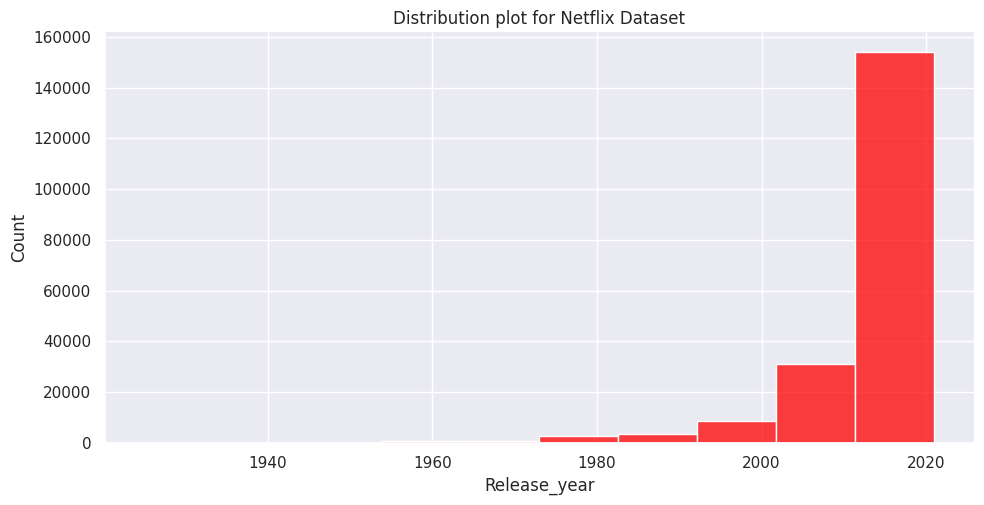

In [58]:
# 1.For continuous variable(s): Distplot, countplot, histogram for univariate analysis

# Distplot for 'release_year'

# Create a distribution plot for rating
plt.figure(figsize=(20,8))
sns.set(style="darkgrid") #set the plot style
sns.displot(df_netflix['release_year'], bins=10, kde=False, aspect = 2, color='Red')

# add labels and a title
plt.xlabel('Release_year')
plt.ylabel('Count')
plt.title('Distribution plot for Netflix Dataset')
# show the plot
plt.show()

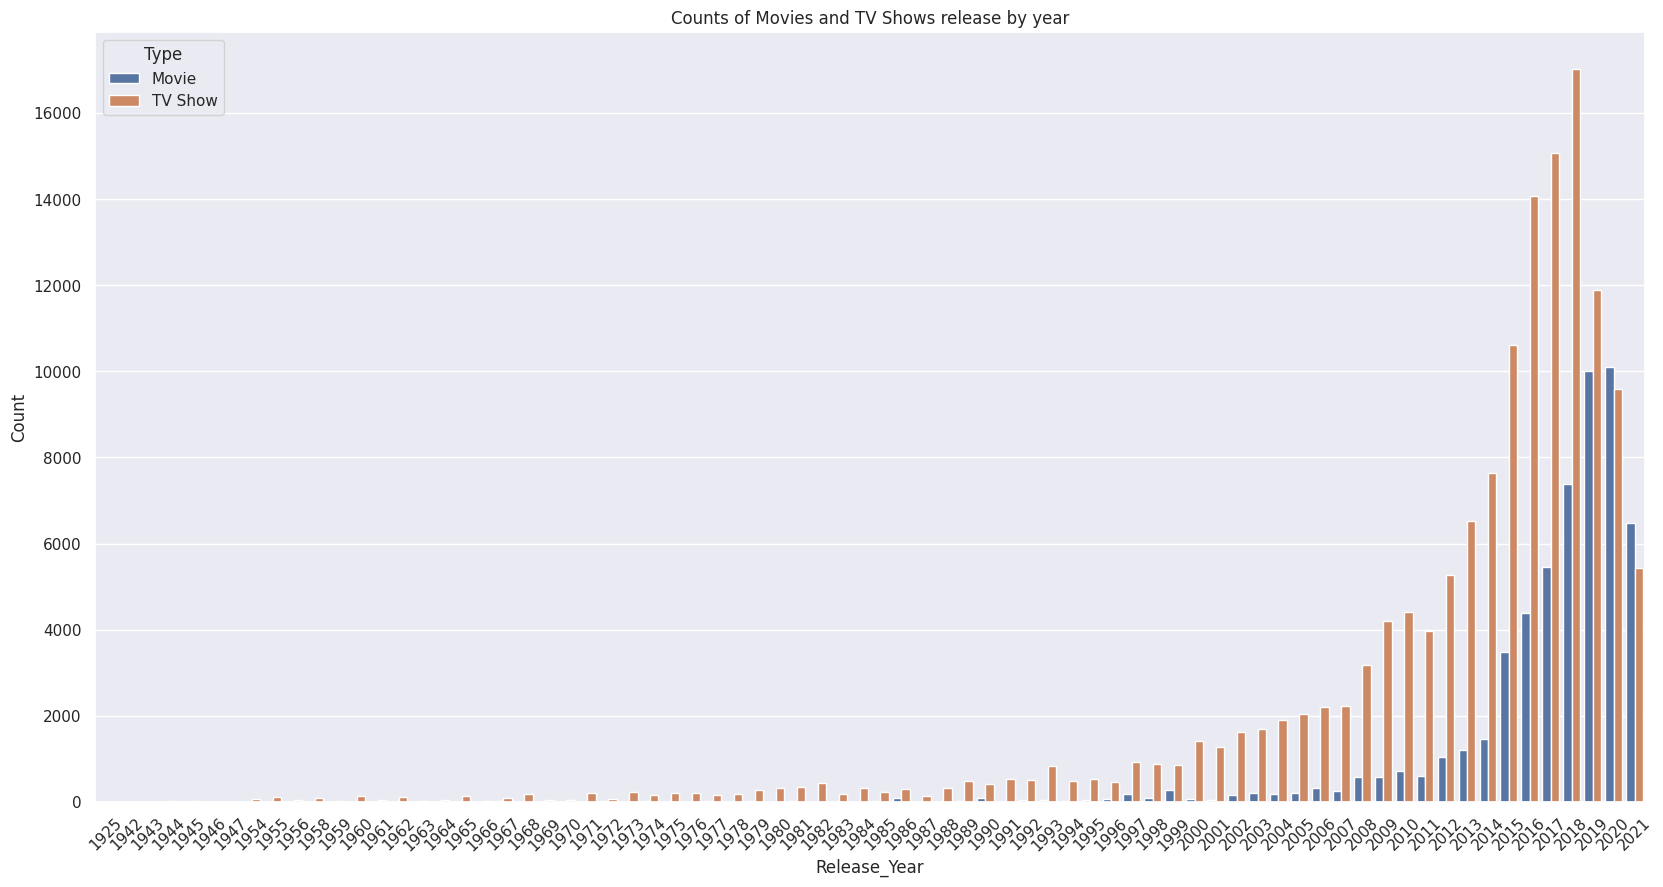

In [59]:
# Create a count plot for the "genre" column

df_count_plot = df_netflix[['show_id','title','release_year','type']]

sns.set(style="darkgrid") #set the style for the plot
plt.figure(figsize=(20,10)) #set the figure size

# Assuming 'Genre'is the name of the categorical variable
sns.countplot(data = df_count_plot,x='release_year',hue='type')

# add label and a title
plt.xlabel('Release_Year')
plt.ylabel('Count')
plt.title('Counts of Movies and TV Shows release by year')
plt.legend(title='Type',loc='upper left', labels = ['Movie','TV Show'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# show the plot
plt.show()

In [60]:
# Calculate the difference in days between 'date_added' and 'release_year'
df_netflix['days_to_add'] = (df_netflix['date_added'] - pd.to_datetime(df_netflix['release_year'], format='%Y')).dt.days
df_netflix.head()

,show_id,Actor,Director,Country,Genre,type,title,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added,days_to_add
0,s1,Unknown Actor,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,2021,9,September,25,Saturday,633
1,s2,Ama Qamata,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday,266
2,s2,Ama Qamata,Unknown Director,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday,266
3,s2,Ama Qamata,Unknown Director,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday,266
4,s2,Khosi Ngema,Unknown Director,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday,266


In [61]:
# Calculate the mode (most common) value for 'days_to_add'
mode_days_to_add = df_netflix['days_to_add'].mode().iloc[0]

print(f"The most common time duration between release and addition to Netflix is approximately {mode_days_to_add} days.")

The most common time duration between release and addition to Netflix is approximately 547 days.


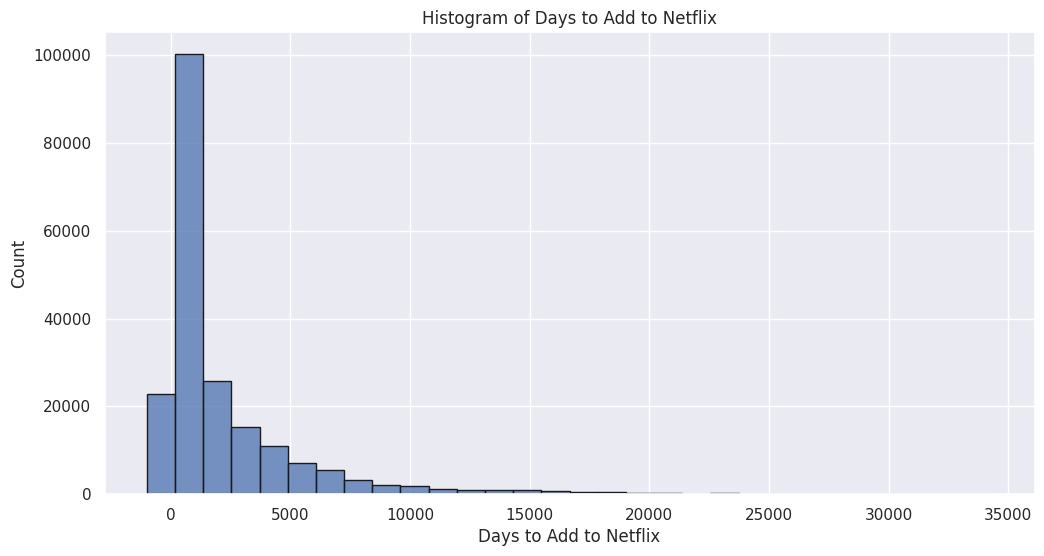

In [62]:
# Histogram for days_to_add
plt.figure(figsize=(12, 6))
sns.histplot(df_netflix['days_to_add'], bins = 30,edgecolor = 'k')

plt.title('Histogram of Days to Add to Netflix')
plt.xlabel('Days to Add to Netflix')
plt.ylabel('Count')
plt.grid(True)
plt.show()

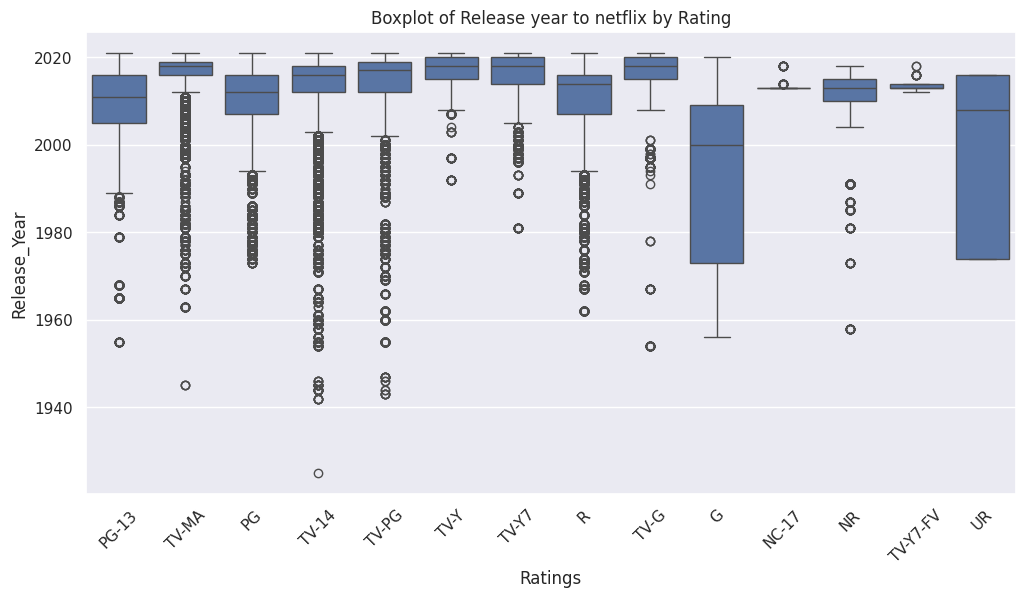

In [63]:
# Boxplot for Categorical Variables
plt.figure(figsize=(12,6))
sns.boxplot(data=df_netflix,x='rating',y='release_year')
plt.title('Boxplot of Release year to netflix by Rating')
plt.xlabel('Ratings')
plt.ylabel('Release_Year')
plt.xticks(rotation=45)
plt.show()

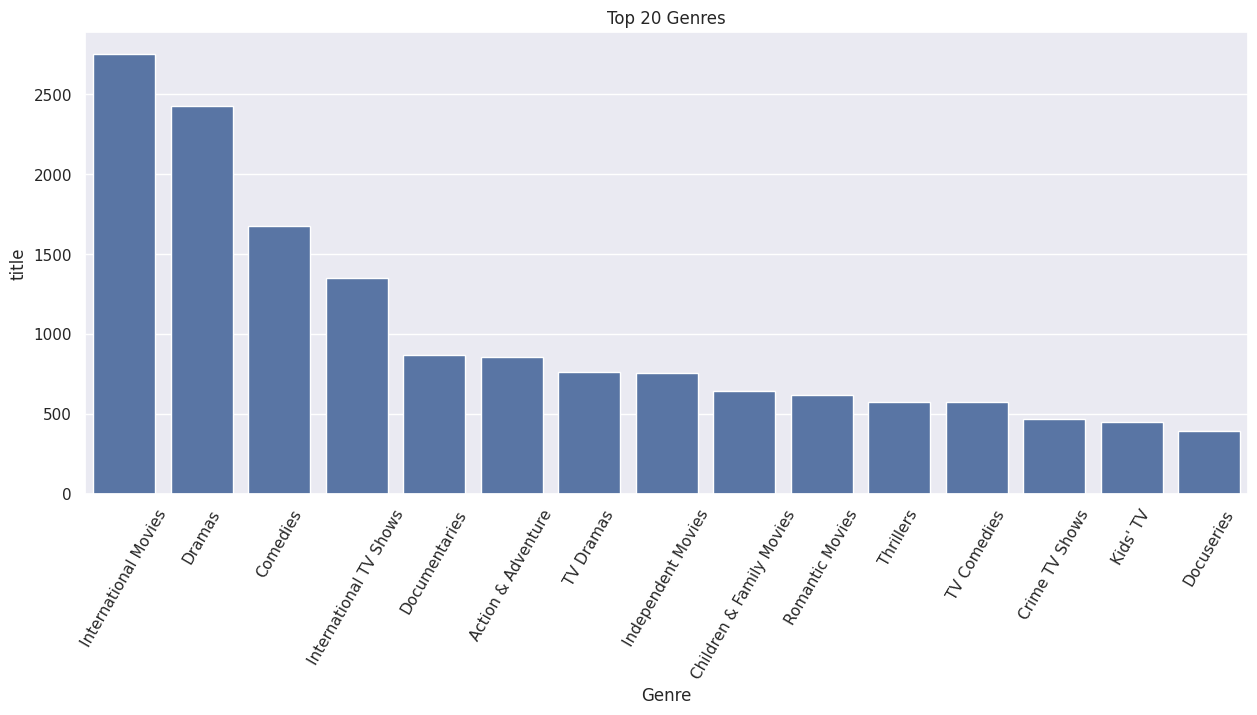

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x = "Genre",y = 'title', data = df_genre)
plt.xticks(rotation = 60)
plt.title('Top 20 Genres')
plt.show()

In [65]:
df_pie = df_netflix.groupby(['type']).agg({'title':'nunique'}).reset_index()
df_pie

,type,title
0,Movie,6129
1,TV Show,2665


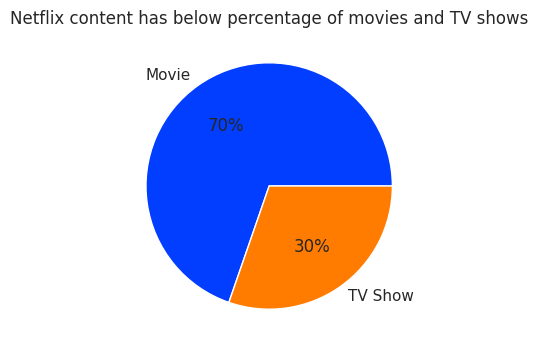

In [66]:
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))

plt.pie(df_pie['title'], labels = df_pie['type'], colors = colors, autopct='%.0f%%')
plt.title('Netflix content has below percentage of movies and TV shows')
plt.show()

### **Comparison of TV shows and Movies**

**Find the number of movies produced in each country and pick the top 10
countries.**

In [67]:
df_movie_country = df_netflix[df_netflix["type"] == 'Movie']
df_movie_country = df_movie_country.groupby(['Country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_movie_country

,Country,title
114,United States,2750
43,India,961
112,United Kingdom,532
116,Unknown Country,440
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114


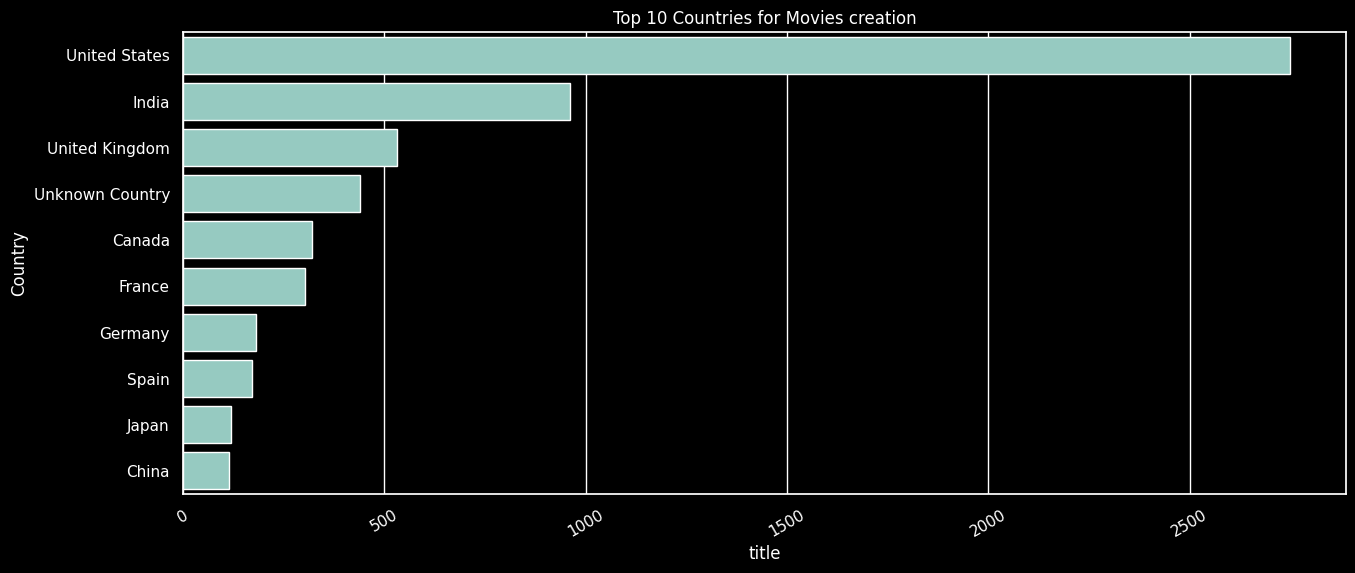

In [68]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
sns.barplot(x = 'title', y = "Country", data = df_movie_country)
plt.xticks(rotation = 30)
plt.title('Top 10 Countries for Movies creation')
plt.show()

**Find the number of TV-shows produced in each country and pick the top 10
countries.**

In [69]:
df_tvshow_country = df_netflix[df_netflix["type"] == 'TV Show']
df_tvshow_country = df_tvshow_country.groupby(['Country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_tvshow_country

,Country,title
63,United States,932
64,Unknown Country,389
62,United Kingdom,271
30,Japan,198
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,65


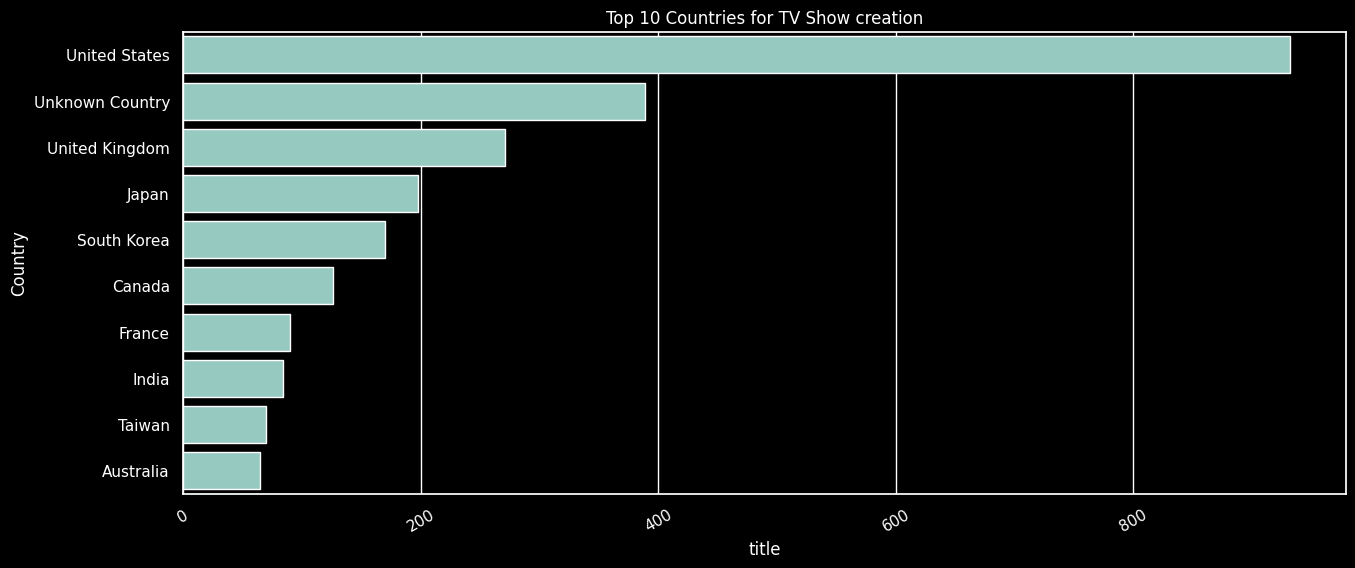

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'title', y = "Country", data = df_tvshow_country)
plt.xticks(rotation = 30)
plt.title('Top 10 Countries for TV Show creation')
plt.show()

## **What is the best time to launch a TV Show or Movie**

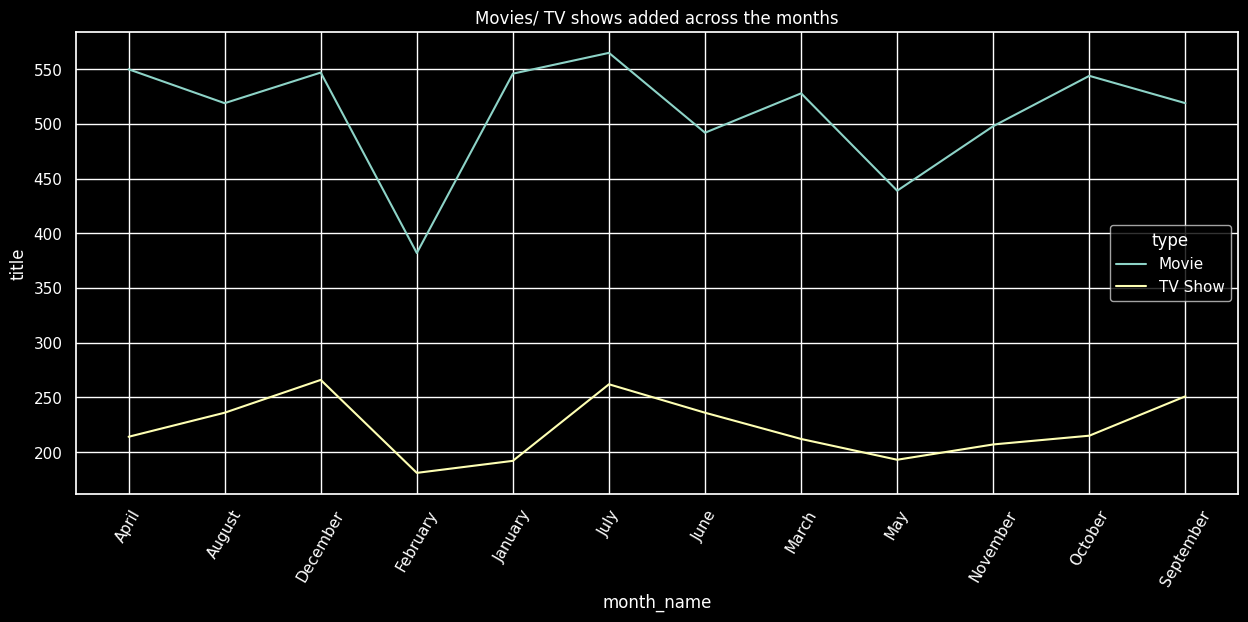

In [71]:
df_month = df_netflix.groupby(['month_name', 'type']).agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "month_name", y = 'title', data = df_month, color = 'red', hue = df_month.type )
plt.xticks(rotation = 60)
plt.title('Movies/ TV shows added across the months')
plt.show()

In [72]:
df_netflix['Genre'].value_counts()

Genre
Dramas                          29756
International Movies            28192
Comedies                        20829
International TV Shows          12837
Action & Adventure              12216
Independent Movies               9818
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7106
Romantic Movies                  6412
TV Comedies                      4914
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4562
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2295
TV Action & Adventure            2278
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult M

## **Which genre movies are more popular or produced more**

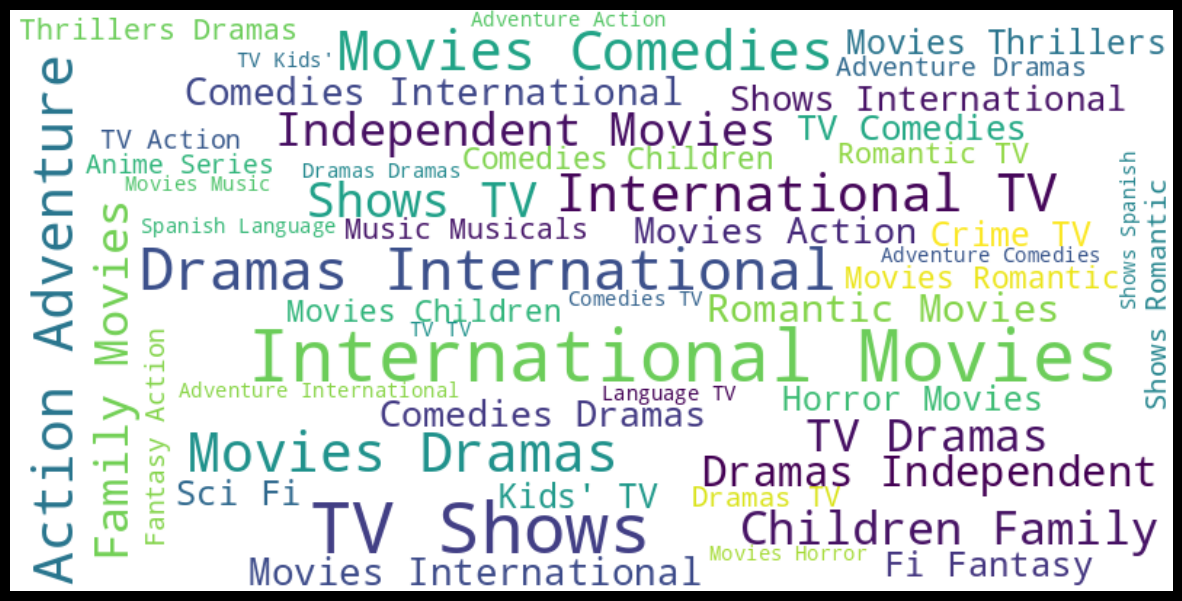

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Example text data
text = " ".join(df_netflix['Genre'])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 800, height = 400, max_font_size= 50, max_words = 50, background_color = 'White').generate(text)

# Display the generated image
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

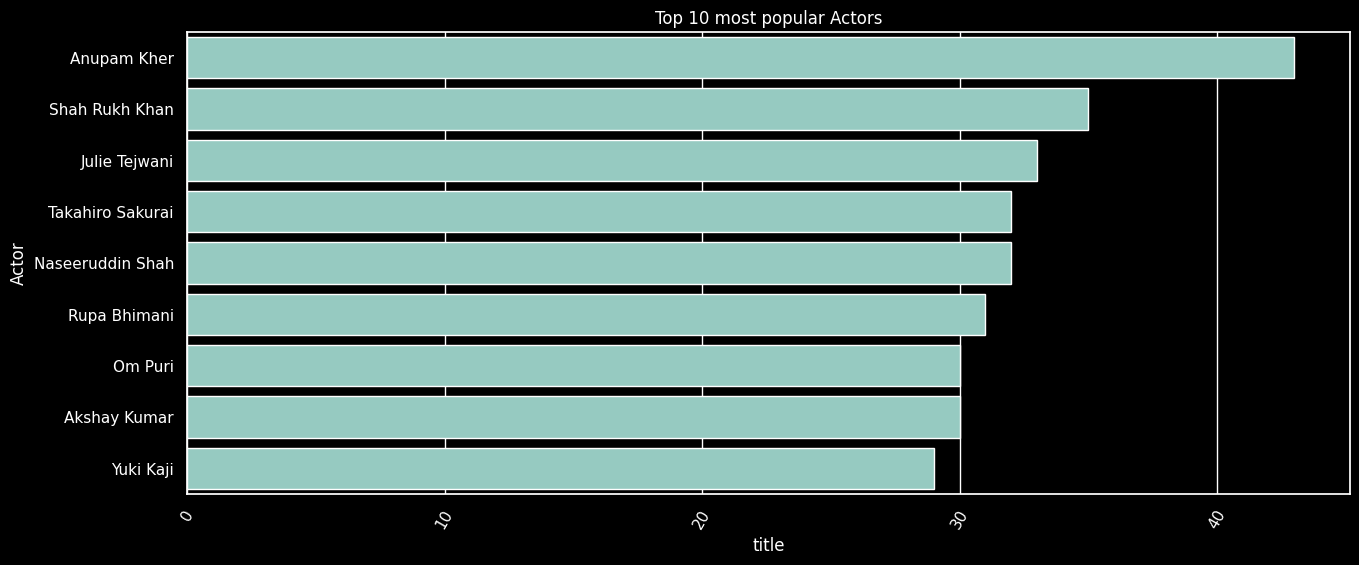

In [74]:
df_actors = df_netflix.groupby(['Actor']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors = df_actors[df_actors['Actor']!='Unknown Actor']
plt.figure(figsize=(15,6))
sns.barplot(y = "Actor",x = 'title', data = df_actors )
plt.xticks(rotation = 60)
plt.title('Top 10 most popular Actors')
plt.show()

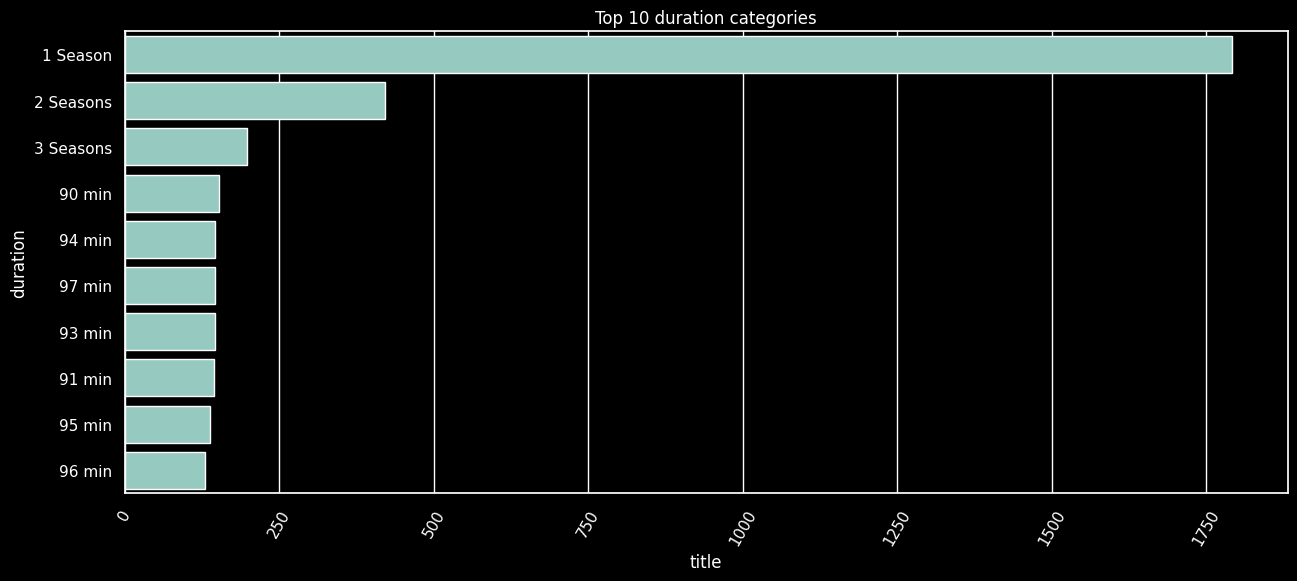

In [75]:
df_duration = df_netflix.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]

plt.figure(figsize=(15,6))
sns.barplot(y = "duration",x = 'title', data = df_duration)
plt.xticks(rotation = 60)
plt.title('Top 10 duration categories')
plt.show()

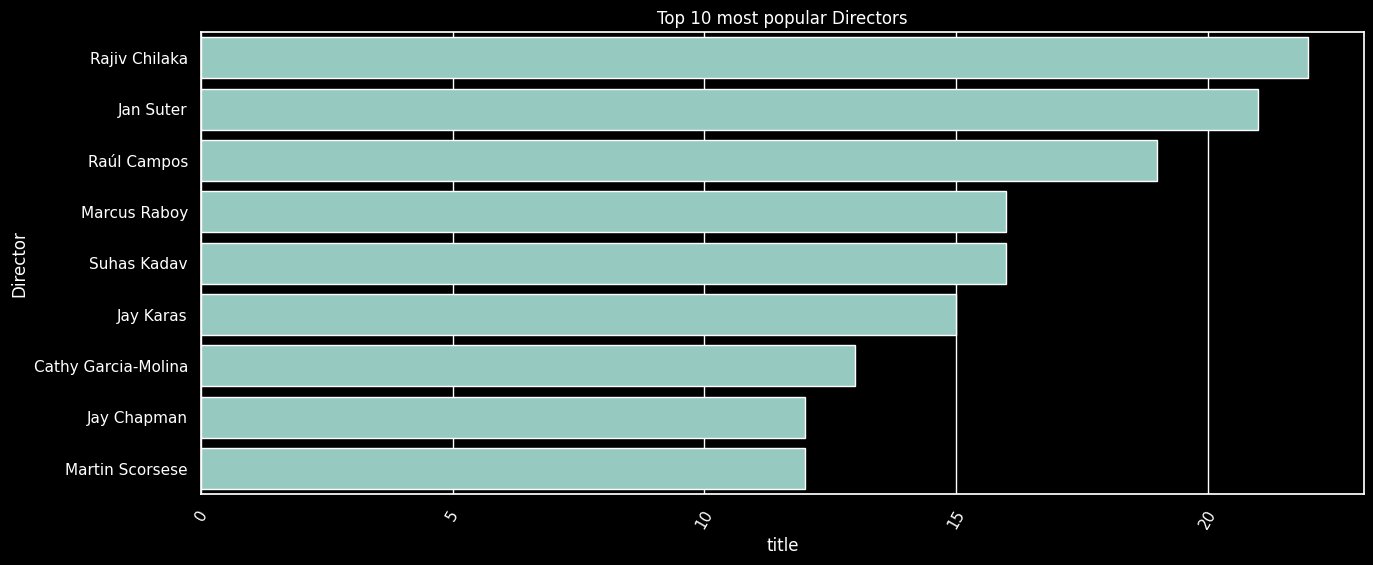

In [76]:
df_directors = df_netflix.groupby(['Director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors = df_directors[df_directors['Director']!='Unknown Director']
plt.figure(figsize=(15,6))
sns.barplot(y = "Director",x = 'title', data = df_directors )
plt.xticks(rotation = 60)
plt.title('Top 10 most popular Directors')
plt.show()

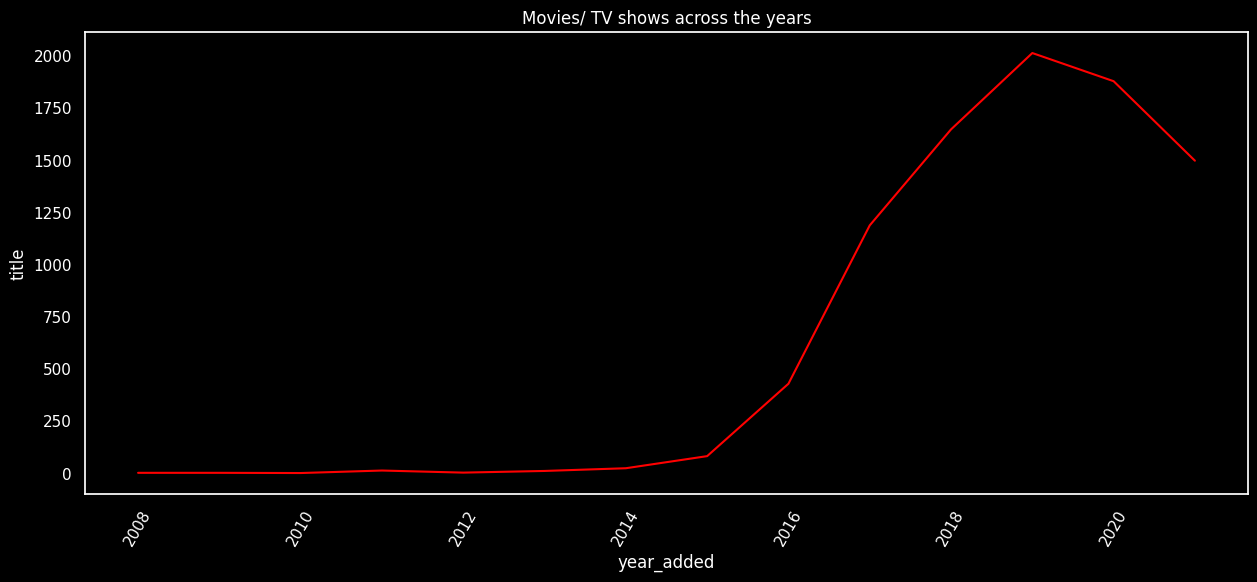

In [77]:
df_year = df_netflix.groupby(['year_added']).agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "year_added",y = 'title', data = df_year, color = 'red' )
plt.xticks(rotation = 60)
plt.grid(False)
plt.title('Movies/ TV shows across the years')
plt.show()

Text(0.5, 1.0, 'Movies and TV Shows added added to Netflix by date ')

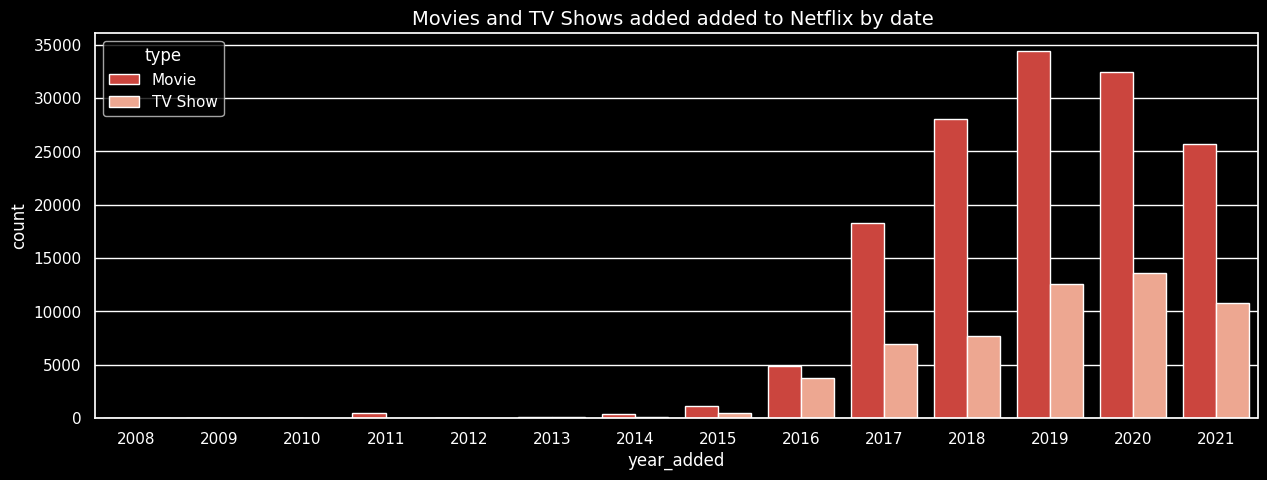

In [78]:
fig = plt.figure(figsize = (15,5))

plt.style.use('dark_background')
sns.countplot(data = df_netflix,x = 'year_added',hue = 'type',palette ="Reds_r")
plt.title('Movies and TV Shows added added to Netflix by date ', fontsize=14)

Over the years both TV shows and movie contents addtion has increased after 2020 its started declining may be due to Covid relief, Movies addtion is more compare to TV shows over the years

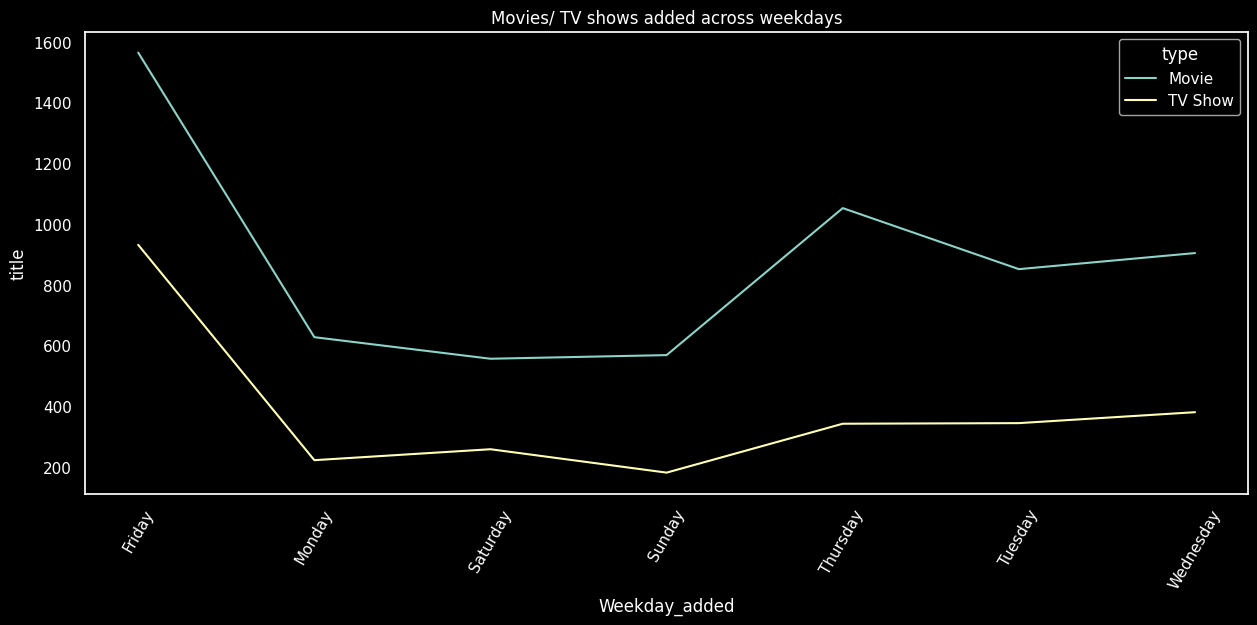

In [79]:
df_weekday = df_netflix.groupby(['Weekday_added', 'type']).agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "Weekday_added",y = 'title', data = df_weekday, color = 'red' , hue = df_weekday.type)
plt.xticks(rotation = 60)
plt.grid(False)
plt.title('Movies/ TV shows added across weekdays')
plt.show()

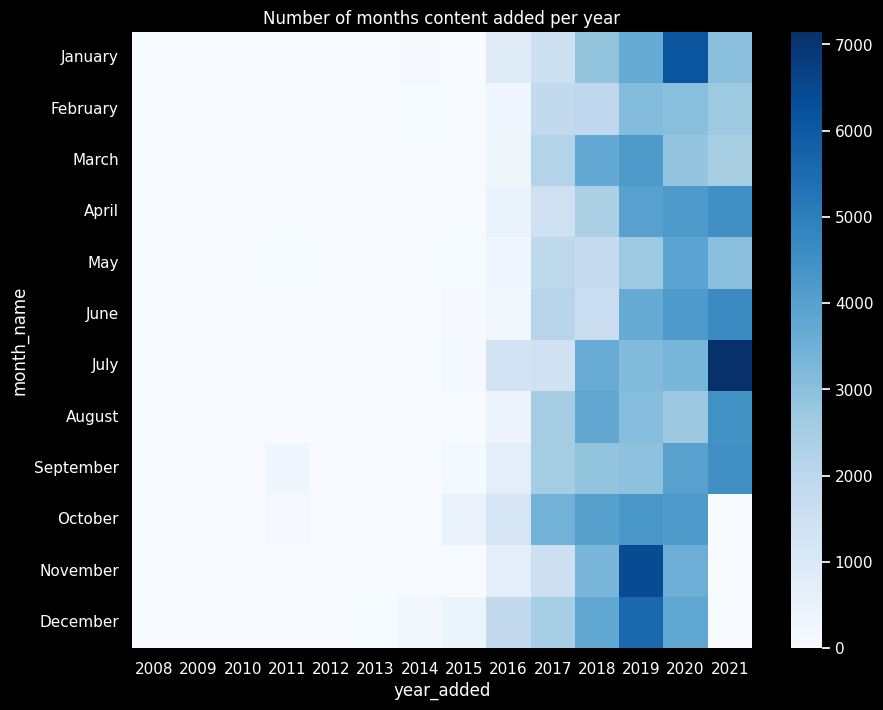

In [81]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']
content = df_netflix.groupby('year_added')['month_name'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10,8))
plt.title("Number of months content added per year")
sns.heatmap(content , cmap = 'Blues')
plt.show()

# **Business Insights**

Over the years both TV shows and movie contents addtion has increased till
2020, but after 2020 its started declining may be due to Covid relief, number of Movies added is more compare to TV shows over the years.

Most of the content get added in december and july month, for day wise, Friday is the best day followed by Thursday

1Movies content are more than tv shows.

TV-MA has highest content rating.

TV shows are added much faster as compare to movies.

It was evident that 1st of every month was when the most content was added.

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

Rajiv Chilaka director producing more movies

Netflix is more focussing on movies compare to TV shows

There is a 70:30 ratio of Movies and TV Shows content in Netflix platform

International Movies, Dramas and Comedies are the most popular are most popular Genre

US,India,UK,Canada and France are leading countries in Content Creation on Netflix

Most of the highly rated content on Netflix is intended for Mature Audiences

The duration of Most Watched content in our whole data is 80-120 mins. These must be movies and Shows having only 1 Season.

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

# **Recommendations**
The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so recommended to generate more content on these genres.

Add more international movies and Tv shows in the month of July 1st or August 1st.

Add movies for Indian Audience, it has been declining since 2018.

While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.

For audience 80-120 mins is the recommended length for movies.   